# 📊 Sales Data Analysis using Pandas

## 🔍 Sections Covered:
- Profit by Region
- Product Performance
- Sales Channel Comparison
- Time-based Trends
- Priority & Shipping Analysis

### Importing the Data File (`./data/sales.csv`)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("data/sales.csv")

In [3]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,599480426,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,6/22/2017,538911855,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2/28/2012,459845054,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,8/12/2010,626391351,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25
5,Asia,Indonesia,Meat,Online,H,8/20/2010,472974574,8/27/2010,2542,421.89,364.69,1072444.38,927041.98,145402.40
6,Sub-Saharan Africa,Djibouti,Household,Online,M,2/3/2011,854331052,3/3/2011,4398,668.27,502.54,2939051.46,2210170.92,728880.54
7,Europe,Greece,Household,Online,L,9/11/2015,895509612,9/26/2015,49,668.27,502.54,32745.23,24624.46,8120.77
8,Sub-Saharan Africa,Cameroon,Cosmetics,Offline,M,1/31/2014,241871583,2/4/2014,4031,437.20,263.33,1762353.20,1061483.23,700869.97
9,Sub-Saharan Africa,Nigeria,Cosmetics,Online,C,11/21/2015,409090793,12/7/2015,7911,437.20,263.33,3458689.20,2083203.63,1375485.57


> `df.head()` is used to show the __data items__.

### Finding Total Profit by Region

In [4]:
profit_by_region = df.groupby("Region")["Total Profit"].sum().sort_values(ascending=False)

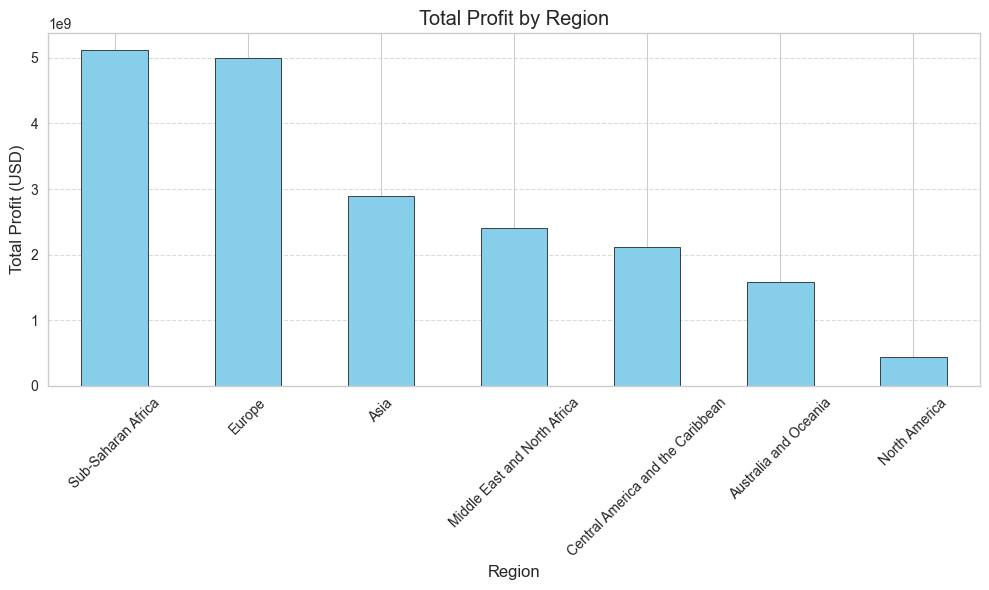

In [5]:
plt.figure(figsize=(10, 6))
profit_by_region.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit (USD)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### Finding Top 10 Item Types by Units Sold

In [6]:
top_items = df.groupby("Item Type")["Units Sold"].sum().sort_values(ascending=False).head(10)

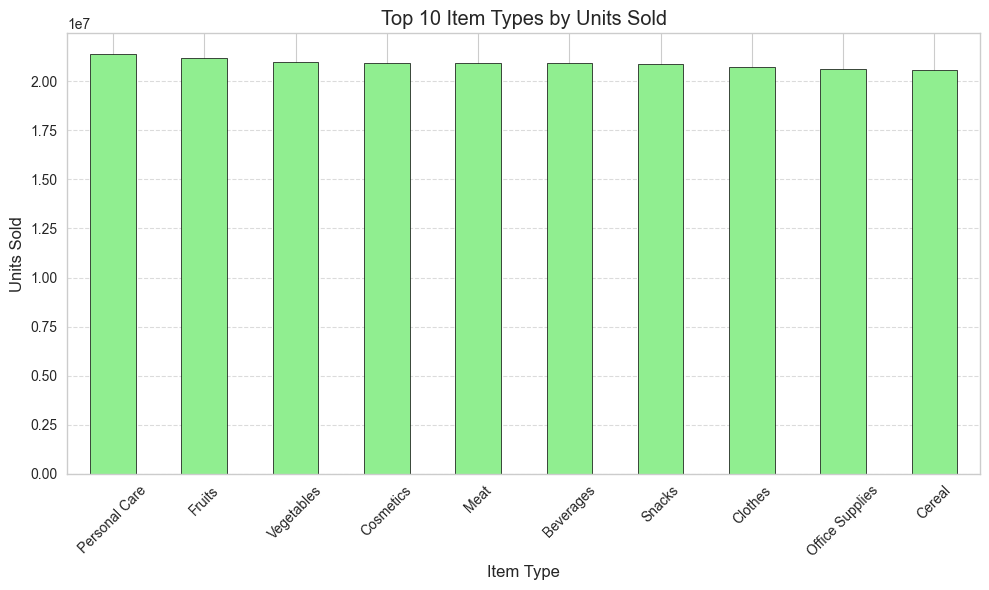

In [7]:
plt.figure(figsize=(10, 6))
top_items.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Top 10 Item Types by Units Sold")
plt.xlabel("Item Type")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### Monthly Sales Trend (Total Revenue)

In [8]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
monthly_revenue = df.groupby(df["Order Date"].dt.to_period("M"))["Total Revenue"].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()

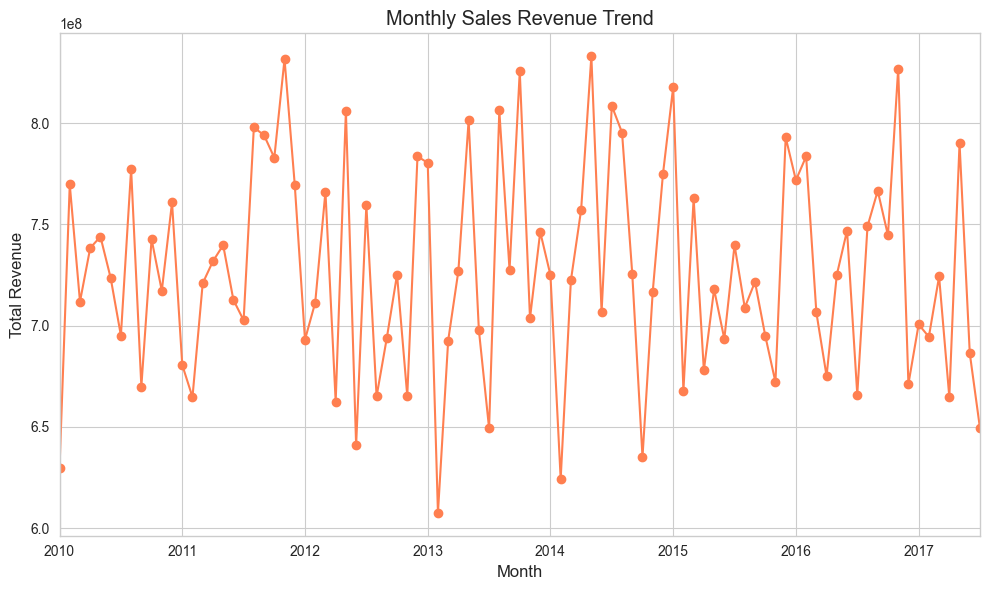

In [9]:
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind="line", marker="o", color="coral")
plt.title("Monthly Sales Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

### Profit Heatmap: Region vs Item Type

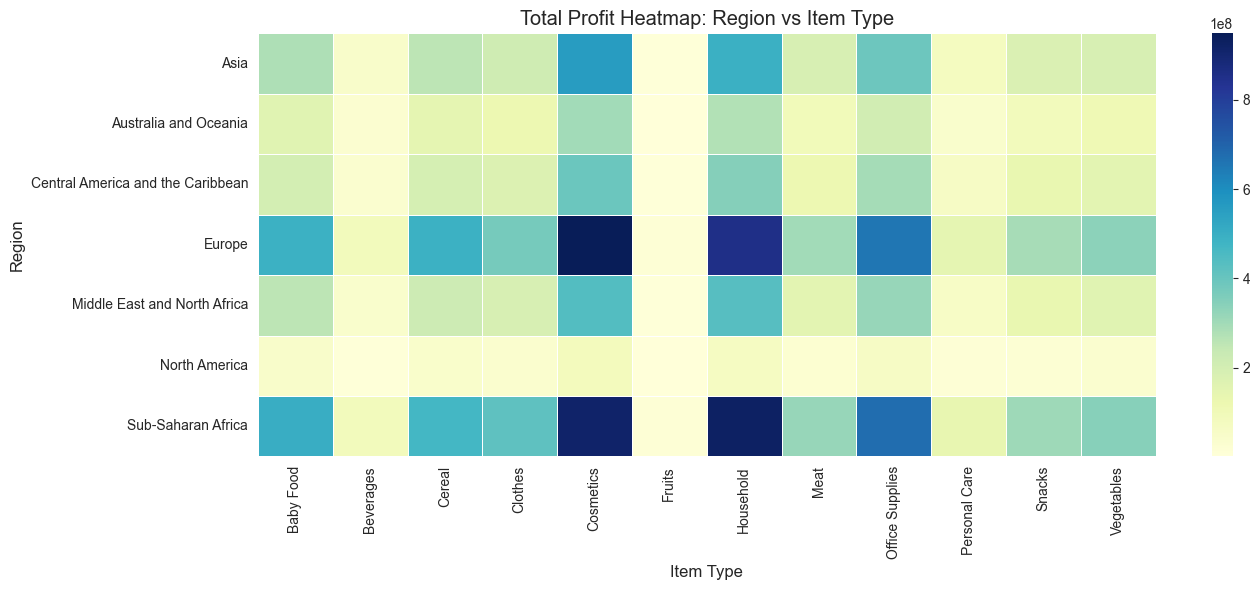

In [10]:
heatmap_data = df.pivot_table(values="Total Profit", index="Region", columns="Item Type", aggfunc="sum", fill_value=0)
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
plt.title("Total Profit Heatmap: Region vs Item Type")
plt.tight_layout()
plt.show()

## 🎯 Business Recommendations

- **Double down on Sub-Saharan Africa** and **Europe**, the most profitable regions.
- **Increase inventory for top 3 items** (e.g., Baby Food, Meat) to meet demand.
- **Speed up shipping** for high-priority orders — delays reduce repeat purchases.
- **Push offline channels** for low-performing items (e.g., Snacks) to increase visibility.
